# Exploratory timeseries

Given extracted Lake CCI data, how to load, aggregate, and visualize.

In [1]:
import xarray as xr
import os
from codebase import ROOT

## Load data product

In [2]:
os.listdir(ROOT/'data'/'extracted')

['.gitkeep',
 'ID6-michigan-LSWT_LSWTflag_LIC-20190825_20200901-v2.1.0.extracted.nc',
 'ID6-michigan-LSWT_LSWTflag_LIC-20200825_20200901-v2.1.0.extracted.nc']

In [3]:
lakes_ds = xr.open_dataset(ROOT/'data'/'extracted'/'ID6-michigan-LSWT_LSWTflag_LIC-20200825_20200901-v2.1.0.extracted.nc')

## Dataset description

In [4]:
print("\nOpened Dataset:\n", lakes_ds)


Opened Dataset:
 <xarray.Dataset> Size: 28MB
Dimensions:                         (time: 8, lat: 539, lon: 399, nv: 2, bnds: 2)
Coordinates:
  * lat                             (lat) float64 4kB 41.61 41.62 ... 46.09 46.1
    lat_bounds                      (lat, nv) float32 4kB ...
  * lon                             (lon) float64 3kB -88.05 -88.04 ... -84.73
    lon_bounds                      (lon, nv) float32 3kB ...
  * time                            (time) datetime64[ns] 64B 2020-08-25T12:0...
    time_bnds                       (time, bnds) datetime64[ns] 128B ...
Dimensions without coordinates: nv, bnds
Data variables:
    crs                             float64 8B ...
    lake_ice_cover_class            (time, lat, lon) float32 7MB ...
    lake_surface_water_temperature  (time, lat, lon) float64 14MB ...
    lswt_quality_level              (time, lat, lon) float32 7MB ...
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.LAKES.day.L3S.LK_PROD

## Map one variable

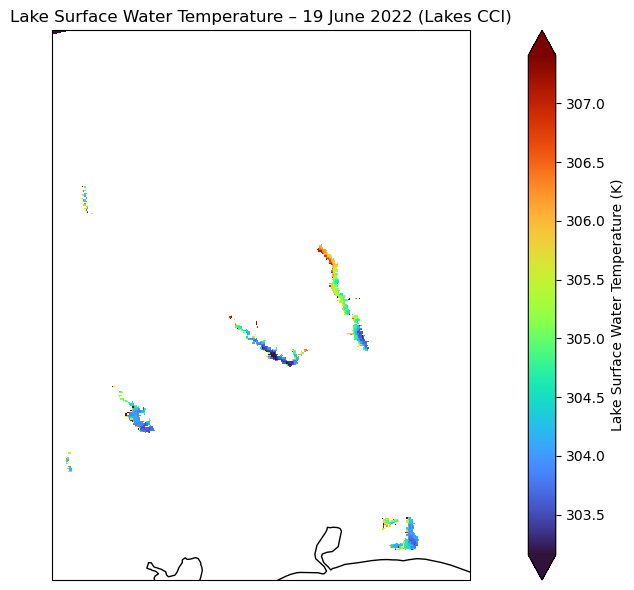

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Select first (and only) time step and remove singleton dimension
lswt = lakes_ds["lake_surface_water_temperature"].isel(time=0).squeeze()
time_str = lakes_ds['time'].isel(time=0).dt.strftime('%d %B %Y').item()

# # For clarity and performance, you may want to subset the region (e.g., African lakes):
# lswt = lswt.sel(lat=slice(-15, 5), lon=slice(25, 45))

# Create figure and axis
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
mesh = lswt.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="turbo",  # or "inferno", "viridis", or "plasma"
    robust=True,
    cbar_kwargs={"label": "Lake Surface Water Temperature (K)"}
)

ax.coastlines()
ax.set_title("Lake Surface Water Temperature – " + time_str + " (Lakes CCI)")

# Add ticks
# ax.set_xticks(range(25, 45, 5), crs=ccrs.PlateCarree())  # longitude ticks
# ax.set_yticks(range(-15, 6, 5), crs=ccrs.PlateCarree())  # latitude ticks
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

## Time series of one variable

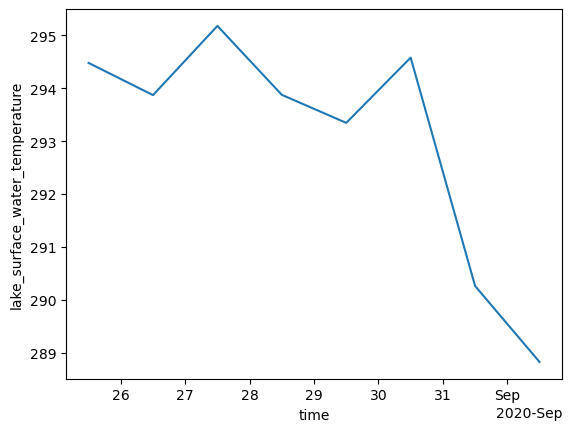

In [15]:
lakes_mean = lakes_ds.mean(dim=['lat','lon'])

lakes_mean['lake_surface_water_temperature'].plot()

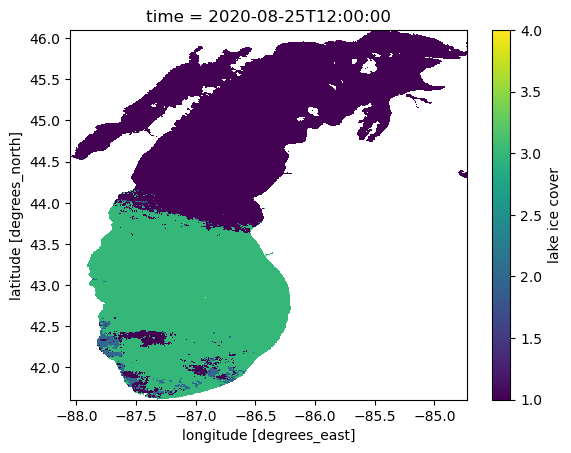

In [20]:
lakes_ds['lake_ice_cover_class'].isel(time=0).plot()

## Scratchwork 

In [22]:
lswt = lakes_ds['lake_surface_water_temperature']

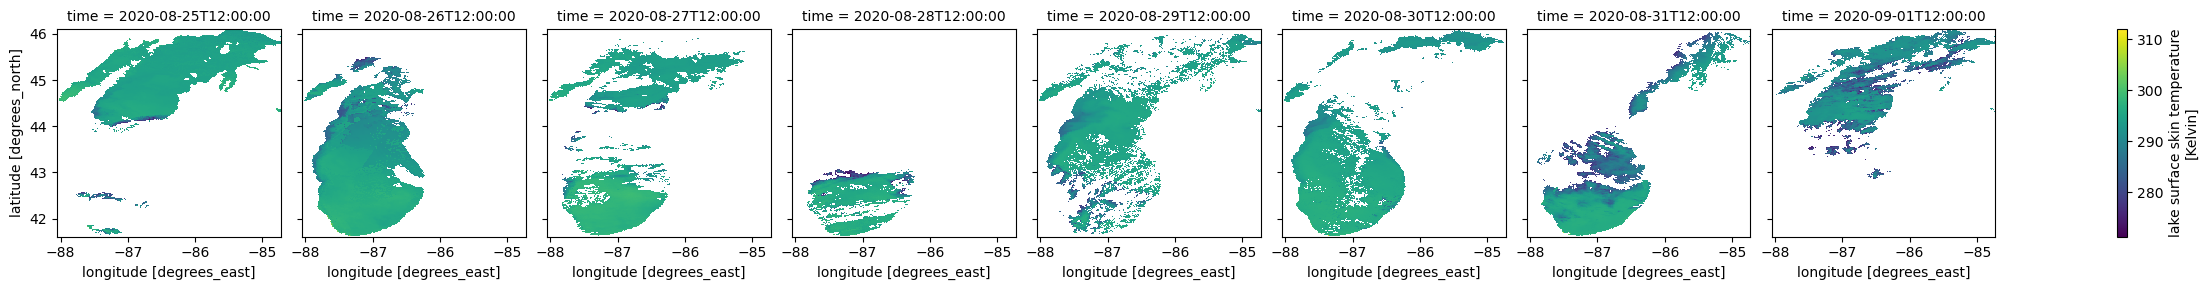

In [25]:
lswt.plot(x='lon',y='lat',col='time')